# Assignment 2 - Machine Learning Basics

## *Guillem Amat Castello*
Netid:  *ga98*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. A flexible model would work better in this case. We do not need to worry too much about overfitting in a dataset that has a small amount of predictors and a large amount of observations.
2. In this case a model that would not be flexible would work better. With many predictors and a small amount of observations, any model would be prone to overfitting. Also, having a model that has many variables would hurt the interpretability.
3. Linear models can have curves but they would not perform as well as non-linear models in a highly non-linear relationship between predictors and features. We should always be wary of overfitting with non-linear models.
4. When the variance of the errors is extremely high the model will most likely be overfitting to the data. In this cases a more inflexible model would be a better option.

<br>

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)**
<br>
i. This would be a classic regression problem. CEO salary is a continuous variable and the other variables whether they are categorical or not, are the features.
<br>
ii. This is an inference problem. We are trying to understand which factors contribute to CEO salary.
<br>
iii. The number of observations $n$ is 500 and the number of predictors $p$ is 3.

**(b)**
<br>
i. This is a classic classification problem. We are trying to predict whether a product will belong to class failure or class success.
<br>
ii. It is a prediction problem. We are interested whether a product will succeed or not, we are not interested in finding how each of the features affects the target variable.
<br>
iii. The number of observations $n$ is 20 and the number of predictors $p$ is 13.

**(c)**
<br>
i. This is a regression problem. We are trying to predict the % change in the stock market which is a combination of continuous variables, hence % change is also continuous.
<br>
ii. We are interested in predicting in this case. It would be an inference problem if we wanted to know which one of the three markets impacts the % changes the most.
<br>
iii. The number of observations $n$ is 52, which is the number of weeks in 2012, and the number of predictors $p$ is 3.

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [6]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

**(a)**

In [12]:
from scipy.spatial import distance
import pandas as pd

#We declare the test point and a variable distance
test_point = (0, 0, 0)
dist = []

for i in range(len(X)):
    dist.append(distance.euclidean(test_point, X[i]))
    
my_dict = pd.DataFrame({'Obs.':[1,2,3,4,5,6], 'Distance':dist})
my_dict.set_index('Obs.', inplace = True)
my_dict.columns.name = my_dict.index.name
my_dict.index.name = None

my_dict

Obs.,Distance
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


**(b)**

In [24]:
classes = {1:'Red', 2:'Blue'}
classifications = np.array([1, 1, 1, 2, 2, 1])

np_dist = np.argsort(np.array(dist))
ind1 =  (np.where(np.isin(np_dist, [0])))
col1 = (classes[int(classifications[ind1])])
print("When K = 1, we predict the color to be %s." % (col1))

When K = 1, we predict the color to be Blue.


**(c)**

In [32]:
ind2 =  (np.where(np.isin(np_dist, [range(1, 3)])))
col2 = (classes[int(np.argmax(np.bincount(classifications[ind2])))])
print("When K = 3, we predict the color to be %s." % (col1))

When K = 3, we predict the color to be Blue.


**(d)**

We would expect the best value of K to be small. The smaller the value of K, the lower the bias, the higher the variance and the higher the flexibility of a model.

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

**(a)**

In [86]:
# (a) Write your own kNN classifier
import math

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
        pass
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x.values
        self.y = y.values
        pass
 
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for row in x.values:           
            Nearest = self.closest_dist(row, k)
            y_hat.append(Nearest)
            
        # Return the estimated targets
        return y_hat

    def distance_calc(self, point1, point2):
        return math.sqrt(np.dot(point1 - point2, point1 - point2))    
    
    def closest_dist(self, n, k):
        Nearest = []
        dist = [self.distance_calc(n, r) for r in self.x]
        close_points = sorted(dist)[:k]
        
        for i in close_points:
                Nearest.append(self.y[dist.index(i)][0])   
        
        return max(Nearest, key = Nearest.count)
    
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**(b)**

In [87]:
#b Loading the datasets
import pandas as pd

X_test_high = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_X_test_high.csv', header = None)
X_test_low = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_X_test_low.csv',  header = None)
X_train_high = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_X_train_high.csv',  header = None)
X_train_low = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_X_train_low.csv',  header = None)

y_test_high = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_y_test_high.csv', header = None)
y_test_low = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_y_test_low.csv',  header = None)
y_train_high = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_y_train_high.csv',  header = None)
y_train_low = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_y_train_low.csv',  header = None)

**(c)**

In [88]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

#low dimensional
#My KNN
K_NN = Knn()

time_1 = time.time()
fit_1 = K_NN.fit(X_train_low, y_train_low)
pred_1 = K_NN.predict(X_test_low, k = 5)
time_2 = time.time()

accuracy_1 = metrics.accuracy_score(y_test_low, pred_1)

#SK-Learn
Sk_K_NN = KNeighborsClassifier(n_neighbors = 5)

time_3 = time.time()
Sk_K_NN.fit(X_train_low, y_train_low)
pred_2 = Sk_K_NN.predict(X_test_low)
time_4 = time.time()

accuracy_2 = metrics.accuracy_score(y_test_low, pred_2)

print('The KNN we implemented runs for ' + str(time_2 - time_1) + ' seconds and has an accuracy of ' + str(accuracy_1))
print('Sckit learn KNN runs for ' + str(time_4 - time_3) + ' seconds and has an accuracy of ' + str(accuracy_2))

The KNN we implemented runs for 3.2139978408813477 seconds and has an accuracy of 0.925
Sckit learn KNN runs for 0.02190399169921875 seconds and has an accuracy of 0.925


C:\Users\guill\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [89]:
#low dimensional
#My KNN
K_NN = Knn()

time_1 = time.time()
fit_1 = K_NN.fit(X_train_high, y_train_high)
pred_1 = K_NN.predict(X_test_high, k = 5)
time_2 = time.time()

accuracy_1 = metrics.accuracy_score(y_test_high, pred_1)

#SK-Learn
Sk_K_NN = KNeighborsClassifier(n_neighbors = 5)
time_3 = time.time()
Sk_K_NN.fit(X_train_high, y_train_high)
pred_2 = Sk_K_NN.predict(X_test_high)
time_4 = time.time()

accuracy_2 = metrics.accuracy_score(y_test_high, pred_2)

print('The KNN we implemented runs for ' + str(time_2 - time_1) + ' seconds and has an accuracy of ' + str(accuracy_1))
print('Sckit learn KNN runs for ' + str(time_4 - time_3) + ' seconds and has an accuracy of ' + str(accuracy_2))

The KNN we implemented runs for 3.503390073776245 seconds and has an accuracy of 0.993
Sckit learn KNN runs for 0.17952632904052734 seconds and has an accuracy of 0.993


C:\Users\guill\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


**(d)** Scikit learn's Knn is much faster, which was expected. It has been optimized to reduce run time and be fast through vectorized computation.

**(e)** It can still be used in many instances where run time is not an issue, but in cases where we need instant results, such as in the stock market, it would not be feasible to implement it.

<br>

<br>

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**(a)**

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.35)

**(b)**

In [ ]:
import matplotlib.pyplot as plt

X_1 = X[y == 0][:,0]
X_2 = X[y == 0][:,1]
X_3 = X[y == 1][:,0]
X_4 = X[y == 1][:,1]

plt.figure(figsize=(8, 8))
plt.title('Plot of a synthetic dataset')
plt.scatter(X_1, X_2, c="slategrey", label="0")
plt.scatter(X_3, X_4, c="forestgreen", label="1")
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


**(c)**

In [ ]:
import random

k = [1, 25, 50]
X_Sample = []
Y_Sample = []

for i in range(3):
    s = random.sample(range(1,1000), 100)
    X_Sample.append(X[s])
    Y_Sample.append(y[s])
    pass

knn_1_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1_1.fit(X_Sample[0], Y_Sample[0])
knn_1_25 = KNeighborsClassifier(n_neighbors = 25)
knn_1_25.fit(X_Sample[0], Y_Sample[0])
knn_1_50 = KNeighborsClassifier(n_neighbors = 50)
knn_1_50.fit(X_Sample[0], Y_Sample[0])

knn_1_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1_1.fit(X_Sample[1], Y_Sample[1])
knn_1_25 = KNeighborsClassifier(n_neighbors = 25)
knn_1_25.fit(X_Sample[1], Y_Sample[1])
knn_1_50 = KNeighborsClassifier(n_neighbors = 50)
knn_1_50.fit(X_Sample[1], Y_Sample[1])

knn_1_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1_1.fit(X_Sample[1], Y_Sample[1])
knn_1_25 = KNeighborsClassifier(n_neighbors = 25)
knn_1_25.fit(X_Sample[1], Y_Sample[1])
knn_1_50 = KNeighborsClassifier(n_neighbors = 50)
knn_1_50.fit(X_Sample[1], Y_Sample[1])

**(d)**

In [ ]:
from matplotlib.colors import ListedColormap

def boundary(X, Y, Knn, k, sample):
    cmap_light = ListedColormap(['#d6ffaa', '#ff8f8f'])
    cmap_strong = ListedColormap(['#509c00', '#9c0000'])
    
    
    xx,yy = np.meshgrid(np.arange(-2,3),np.arange(-2,2))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

    Z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap= cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c= Y, cmap = cmap_strong)
    
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.title("k = {}, Sample = {}".format(k, sample))
    pass


<Figure size 1080x1080 with 0 Axes>

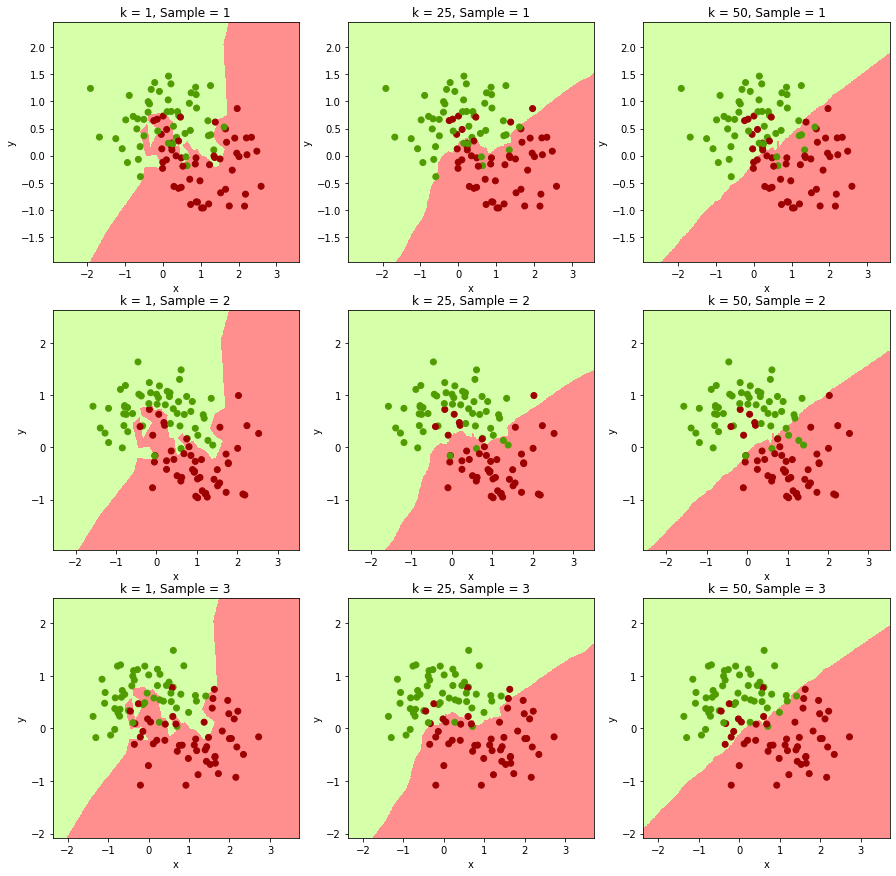

In [152]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
plt.figure()
plt.subplots(3,3)

plt.subplot(331)
boundary(X_Sample[0], Y_Sample[0], knn_1_1, 1, 1)

plt.subplot(332)
boundary(X_Sample[0], Y_Sample[0], knn_1_25, 25, 1)

plt.subplot(333)
boundary(X_Sample[0], Y_Sample[0], knn_1_50, 50, 1)

#---------------------------------------------------

plt.subplot(334)
boundary(X_Sample[1], Y_Sample[1], knn_1_1, 1, 2)

plt.subplot(335)
boundary(X_Sample[1], Y_Sample[1], knn_1_25, 25, 2)

plt.subplot(336)
boundary(X_Sample[1], Y_Sample[1], knn_1_50, 50, 2)

#------------------------------------------------------

plt.subplot(337)
boundary(X_Sample[2], Y_Sample[2], knn_1_1, 1, 3)

plt.subplot(338)
boundary(X_Sample[2], Y_Sample[2], knn_1_25, 25, 3)

plt.subplot(339)
boundary(X_Sample[2], Y_Sample[2], knn_1_50, 50, 3)

plt.show()

**(e)**

**Rows differences:** All rows vary equally, which makes sense because the data was randomly sampled.
<br>
**Columns differences:** There are clear differences across columns. The boundaries of the first column are more volatile and flexible while the boundaries from the last column don't seem to change much.
<br>
**Best performance:** The decision boundaries that better separate the data are  the ones with $k = 25$. They seem to generalize well across the different samples.
<br>
**Most variance:** The model is at its most flexible for $k = 1$. Decision boundaries change significantly with the different samples.

**(f)**

The more flexible we make our model the more likely it will be to overfit to the data, as it is the case with $k = 1$. In the same fashion, if we make our model too inflexible we are likely to be missing on patterns in the data and subsequently underfit, as it is the case with $k = 50$. There is a sweet spot of performance in the middle where $k = 25$ where our model picks on patterns but is solid enough when presented with other samples.

<br>
<br>

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)**

In [157]:
from sklearn.datasets import make_moons

X_test, y_test = make_moons(n_samples = 1000, noise = 0.35)

**(b)**

In [177]:
test_accuracy = []
train_accuracy = []

for k in range(1, 500):
    Knn = KNeighborsClassifier(n_neighbors = k)
    Knn.fit(X, y)
    train_predictions = Knn.predict(X)
    test_predictions = Knn.predict(X_test)
    test_accuracy.append(1 - metrics.accuracy_score(y_test, test_predictions))
    train_accuracy.append(1 - metrics.accuracy_score(y, train_predictions))
    

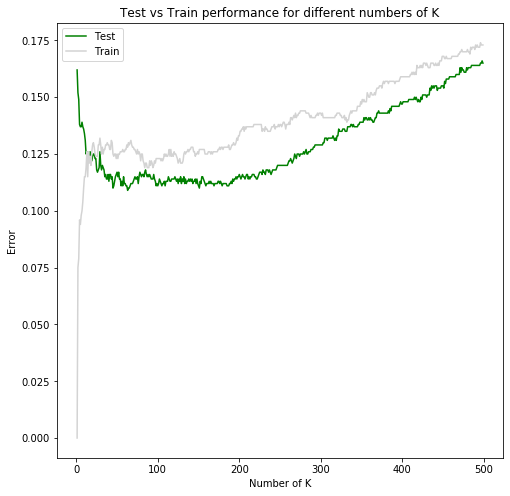

In [178]:
plt.figure(figsize = (8,8))
plt.plot(range(1,500), test_accuracy, label = 'Test', color = 'green')
plt.plot(range(1, 500), train_accuracy, label = 'Train', color = 'lightgrey')
plt.title('Test vs Train performance for different numbers of K')
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.legend()
plt.show()

**(c)**

The errors decrease at the beginning as our model becomes less flexible and overfits less to the data. At some point it reaches the number that minimizes k at the test set and then it rises again as the model starts to underfit with ever more inflexible models. 

**(d)**

Low values of k such as 1 represent low bias and high variance. High values of k represent high bias and low variance.

**(e)**

In [180]:
test_accuracy.index(min(test_accuracy))

62

**(f)**

In SVM for instance it is C that controls the amount of flexibility. In linear regression it is the parameters.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

**(a)**

In [186]:
test = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_Q7_test.csv', header = 0)
train = pd.read_csv('C:/Users/guill/Desktop/Dataset/A2_Q7_train.csv', header = 0)

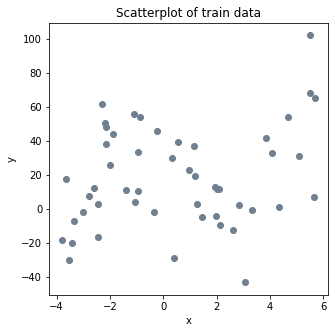

In [198]:
plt.figure(figsize=(5,5))
plt.scatter(train.iloc[:, 1], train.iloc[:, 2], color = 'slategrey')
plt.title('Scatterplot of train data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**(b)**

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Declaring Train or Test
X_train = np.array(train.iloc[:, 1]).reshape(-1, 1)
y_train = np.array(train.iloc[:, 2]).reshape(-1, 1)
X_test = np.array(test.iloc[:, 1]).reshape(-1, 1)
y_test = np.array(test.iloc[:, 2]).reshape(-1, 1)

#Linear Regression instantiate and fit
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Predictions
pred = lin_reg.predict(X_train)

#Scores
print('R2: ' + str(r2_score(y_train, pred)))
print('MSE: ' + str(mean_squared_error(y_train, pred)))
print('Equation: y = ' + str(round(lin_reg.intercept_[0], 1)) + ' + ' + str(round(lin_reg.coef_[0][0], 1)) + 'a')

R2: 0.06486123304769709
MSE: 791.4167471701105
Equation: y = 17.2 + 2.6a


**(c)**

In [252]:
#I will chose a logarithmic transformation based on the scatterplot
log_xtrain = np.square(X_train)
X_train_new = np.c_[np.array(train.iloc[:, 1]), log_xtrain]
       
#Linear Regression and fit    
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_new, y_train)

#Predictions
pred2 = lin_reg2.predict(X_train_new)

#Scores
print('R2: ' + str(r2_score(y_train, pred2)))
print('MSE: ' + str(mean_squared_error(y_train, pred2)))
print('Equation: y = ' + str(round(lin_reg2.intercept_[0], 1)) + ' + ' + str(round(lin_reg2.coef_[0][0], 1)) + 'a + ' + str(round(lin_reg2.coef_[0][1], 1)) + 'b')

R2: 0.08529040403484756
MSE: 774.1273473276406
Equation: y = 12.9 + 1.6a + 0.6b


**(d)**

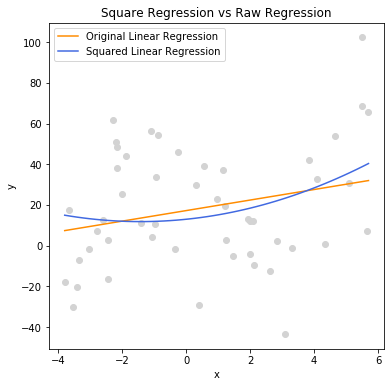

In [269]:
#Plotting Scatter
plt.figure(figsize = (6, 6))
plt.scatter(X_train, y_train, color = 'lightgrey')

#Plotting the first Linear Regression
a = np.linspace(min(X_train), max(X_train))
line1 = lin_reg.intercept_[0] + lin_reg.coef_[0] * a
plt.plot(a, np.array(line1).reshape(-1,1), color = 'darkorange', label="Original Linear Regression")

#Plotting the second Linear Regression
b = np.array(np.square(a))
line2 = lin_reg2.intercept_+ lin_reg2.coef_[0][0] * a + lin_reg2.coef_[0][1] * b
plt.plot(a, line2, color = 'royalblue', label = "Squared Linear Regression")

#Adding extra details
plt.title('Square Regression vs Raw Regression')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**(e)**

In [279]:
#Raw Linear test
lin_reg_test = lin_reg.score(X_test, y_test)
pred3 = lin_reg.predict(X_test)

print('Original Data')
print('R2: ' + str(r2_score(y_test, pred3)))
print('MSE: ' + str(mean_squared_error(y_test, pred3)))

Original Data
R2: -0.13289928472598378
MSE: 1116.6632365616085


In [280]:
#Square Linear test
square_x_test = np.square(X_test)
x_test_new = np.c_[np.array(test.iloc[:, 1]), square_x_test]

#Fitting linreg to 
lin_reg_test2 = lin_reg2.score(x_test_new, y_test)
pred4 = lin_reg2.predict(x_test_new)

print('Squared Data')
print('R2: ' + str(r2_score(y_test, pred4)))
print('MSE: ' + str(mean_squared_error(y_test, pred4)))

Squared Data
R2: -0.12025627926664328
MSE: 1104.2014232420706


**(f)**

Both perform very poorly on the test data and the train data. It seems that the transformed model performs a bit better than the original as it has a higher R-Squared and a lower Mean Squared Error.

**(g)**

If we had a test dataset that was very different from the train one, then the model that would perform better would be the more simple and less flexible one. That happens because the more flexible model would pick up patterns that would not exist on the test set.